[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bachhvu/Amazon-NLP/blob/main/Model%20Development.ipynb)



## Load Preprocessed Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import os
import shutil
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Electronics_processed.csv', index_col=0)
df

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,review_text,review_time
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",5.0,1370131200,got ta gps got gps husband otr road trucker im...,2013-06-02
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",1.0,1290643200,disappointed professional otr truck driver bou...,2010-11-25
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",3.0,1283990400,impression well say unit truck four day prior ...,2010-09-09
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",2.0,1290556800,great grafics poor gps going write long review...,2010-11-24
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",1.0,1317254400,major issue excuse support mine year got try r...,2011-09-29
...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",5.0,1405555200,boom pop pow deliver burned listening hour sin...,2014-07-17
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",5.0,1405382400,thin light without compromising sound quality ...,2014-07-15
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",5.0,1405555200,form factor durability better sound quality im...,2014-07-17
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]",5.0,1405641600,superb audio quality comfortable set earphone ...,2014-07-18


## Extra Data Wrangling

In [4]:
##########################################
## Classify ratings as good
##########################################

good_rate = len(df[df['overall'] >= 3])
bad_rate = len(df[df['overall'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for products'.format(good_rate))
print ('Bad ratings : {} reviews for products'.format(bad_rate))

Good ratings : 1498322 reviews for products
Bad ratings : 190864 reviews for products


In [5]:
df['rating_class'] = df['overall'].apply(lambda x: 0 if x < 3 else 1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,review_text,review_time,rating_class
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",5.0,1370131200,got ta gps got gps husband otr road trucker im...,2013-06-02,1
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",1.0,1290643200,disappointed professional otr truck driver bou...,2010-11-25,0
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",3.0,1283990400,impression well say unit truck four day prior ...,2010-09-09,1
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",2.0,1290556800,great grafics poor gps going write long review...,2010-11-24,0
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",1.0,1317254400,major issue excuse support mine year got try r...,2011-09-29,0


In [5]:
df['Year'] = pd.DatetimeIndex(df['review_time']).year

In [6]:
df['Month'] = pd.DatetimeIndex(df['review_time']).month

## Exploratory Data Analysis

Summary Statistics

In [7]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(df['reviewerID'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(df['asin'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(df)/len(df['reviewerID'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(df)/len(df['asin'].unique()))))


Number of unique customers : 192403

Number of unique products : 63001

Review per customer: 8.779416121370248

Review per product: 26.81205060237139


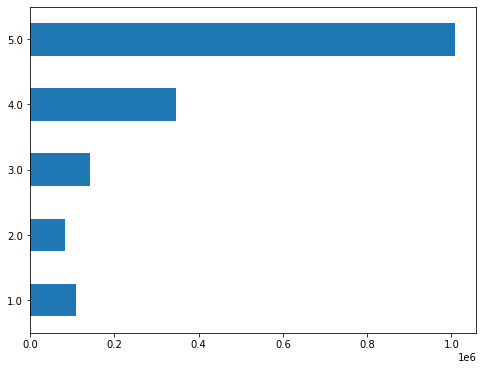

In [18]:
plt.figure(figsize=(8,6))
df['overall'].value_counts().sort_index().plot(kind="barh")

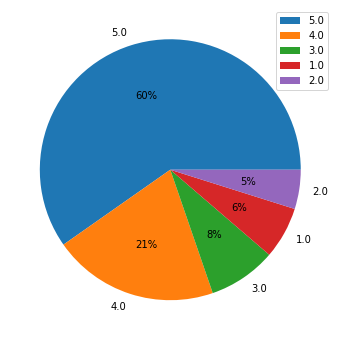

In [19]:
plt.figure(figsize=(8,6))
plt.pie(df['overall'].value_counts(), labels = df['overall'].value_counts().index, autopct='%1.0f%%')
plt.legend()

Plot number of review per day

In [12]:
fig = go.Figure([go.Bar(x=df['Year'].value_counts().sort_index().index, y=df['Year'].value_counts().sort_index())])
fig.show()

Plot number of unique customer leaving review per day

In [15]:
fig = go.Figure([go.Bar(x=df['Year'].value_counts().sort_index().index, y=df.groupby(["Year"])["reviewerID"].nunique())])
fig.show()

Plot number of product reviewed per day

In [14]:
fig = go.Figure([go.Bar(x=df['review_time'].value_counts().sort_index().index, y=df.groupby(["review_time"])["asin"].nunique())])
fig.show()

In [25]:
# Import package
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(18, 6))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

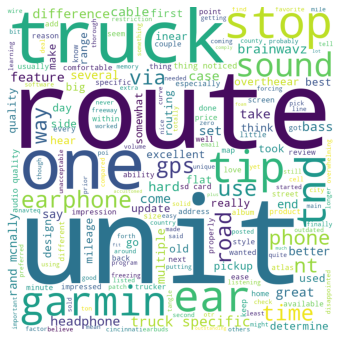

In [26]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 800, random_state=1, background_color='white', stopwords = STOPWORDS).generate(str(df['review_text'].values))
# Plot
plot_cloud(wordcloud)

## Model Development

In [6]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 4.2 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 3.3 MB 35.5 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 596 kB 47.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
import transformers
from transformers import AutoModel, BertTokenizerFast
import torch
import torch.nn as nn

In [8]:
device = torch.device("cuda")

Split data into train and test set

In [ ]:
X = df['reviewText']
y = df['overall']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

ModuleNotFoundError: No module named 'transformers'